In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74"
     alt="HCA Logo" height="100" width="100"
     style="float: left; margin-right: 10px;">

|Name  | Value |
| :- |:-------------: |
| ***Notebook:***  | ***HotChili Trader Tear Sheet*** |
| **Version:**  | 1.0.1c |
| **Date:**  | 2020-08-06  |
| **Copyright:**  | @2019-2020 |
| **Company:**  | **HotChili Analytics, LLC** |
| **Author   :**  | Alan Coppola|(ajjcoppola@hotchilianalytics.com) |
| **Author   :**  | Jeff Coppola|(jeff@hotchilianalytics.com) |

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
### %pylab inline
###figsize(12, 12)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
pd.set_option("max_colwidth", 400)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
# Parameters for location of zipline-broker run
###nb_dir = "/home/hca-dev/hca/nb/HCA_Segmsec/"
###ans_pkl = "HCA_Segmsec.pkl"
nb_dir = "/home/hca-dev/hca/strats/logs/"
ans_pkl = "zlb-segmsec-bt.pkl"
ans_data_file = nb_dir + ans_pkl
cli_file = '/home/hca-dev/hca/strats/Data/Sim/algostats/cli_args_run_file-Sim.sh'

# Read in backtest results for analysis
perf=pd.read_pickle(ans_data_file)

In [5]:
perf.columns
#dir(perf)

Index(['CAGR', 'Lv', 'MxLv', 'PnL', 'Shorts', 'algo_volatility',
       'algorithm_period_return', 'alpha', 'benchmark_period_return',
       'benchmark_volatility', 'beta', 'capital_used', 'ending_cash',
       'ending_exposure', 'ending_value', 'excess_return', 'gross_leverage',
       'long_exposure', 'long_value', 'longs_count', 'max_drawdown',
       'max_leverage', 'net_leverage', 'orders', 'period_close',
       'period_label', 'period_open', 'pnl', 'portfolio_value', 'positions',
       'returns', 'sharpe', 'short_exposure', 'short_value', 'shorts_count',
       'sortino', 'starting_cash', 'starting_exposure', 'starting_value',
       'trading_days', 'transactions', 'treasury_period_return'],
      dtype='object')

In [6]:
perf.shape

(540, 42)

In [7]:
#perf.positions

In [8]:
import pandas as pd
returns, positions, transactions= pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [9]:
#positions

In [10]:
#transactions

In [11]:
import sys

print("Tear Sheet File : {}".format(ans_data_file))
print("-----------------------------------")
print("Python version={}".format(sys.version))
print("Matplotlib version={}".format(mp.__version__))
print("Numpy version={}".format(np.version.version))



Tear Sheet File : /home/hca-dev/hca/strats/logs/zlb-segmsec-bt.pkl
-----------------------------------
Python version=3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
Matplotlib version=3.1.1
Numpy version=1.14.1


In [12]:
#pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

In [13]:
#returns.plot()

In [14]:
#transactions

In [15]:
#from datetime import datetime
#import pytz
#start = datetime(2017, 2, 11, 0, 0, 0, 0, pytz.utc)
#end = datetime(2019, 3, 14, 0, 0, 0, 0, pytz.utc)
#s=pd.Timestamp(start)

In [16]:
#pf.create_position_tear_sheet(returns=returns,positions=positions)
#pf.plot_perf_stats(returns= returns, factor_returns=returns)

In [17]:
sim_start=perf.index[0]
sim_end= perf.index[-1]
print("start={}  end={}".format(sim_start,sim_end))


start=2019-01-02 00:00:00+00:00  end=2021-02-23 00:00:00+00:00


In [18]:
print("Command line for this Sim run:\n")
!cat $cli_file

Command line for this Sim run:

/home/hca-dev/miniconda3/envs/hca/bin/zipline
-x
IS_LIVE=False
-x
PSF=/home/hca-dev/hca/strats/logs/port_summ_file.txt
-x
LEVERAGE_FAC=1.0
-x
LONG_PCT=0.7
-x
PRATE_PCT=0.1
-x
LIMIT_ORDER_PCT=0.02
-x
LMT_PCT=0.03
-x
MINUTES_TO_REBAL=1
-x
algo_name=SaasTech
run
-f
/home/hca-dev/hca/strats/hca_segmsec.py
--bundle
sharadar-prices
--data-frequency
daily
--capital-base
40000.0
-o
/home/hca-dev/hca/strats/logs/zlb-segmsec-bt.pkl
-s
01-01-2019
-e
02-23-2021

Entire data start date: 2019-01-03
Entire data end date: 2021-02-23
Backtest months: 25


,Backtest
Annual return,33.9%
Cumulative returns,86.6%
Annual volatility,36.3%
Sharpe ratio,0.99
Calmar ratio,0.77
Stability,0.64
Max drawdown,-44.1%
Omega ratio,1.32
Sortino ratio,1.40
Skew,-1.37


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.06,2020-01-08,2020-03-16,2020-06-16,115
1,13.53,2019-07-30,2019-09-27,2019-11-21,83
2,6.79,2020-08-26,2020-09-11,2020-09-25,23
3,5.32,2019-04-29,2019-05-13,2019-06-05,28
4,4.98,2020-10-12,2020-11-02,2020-11-04,18


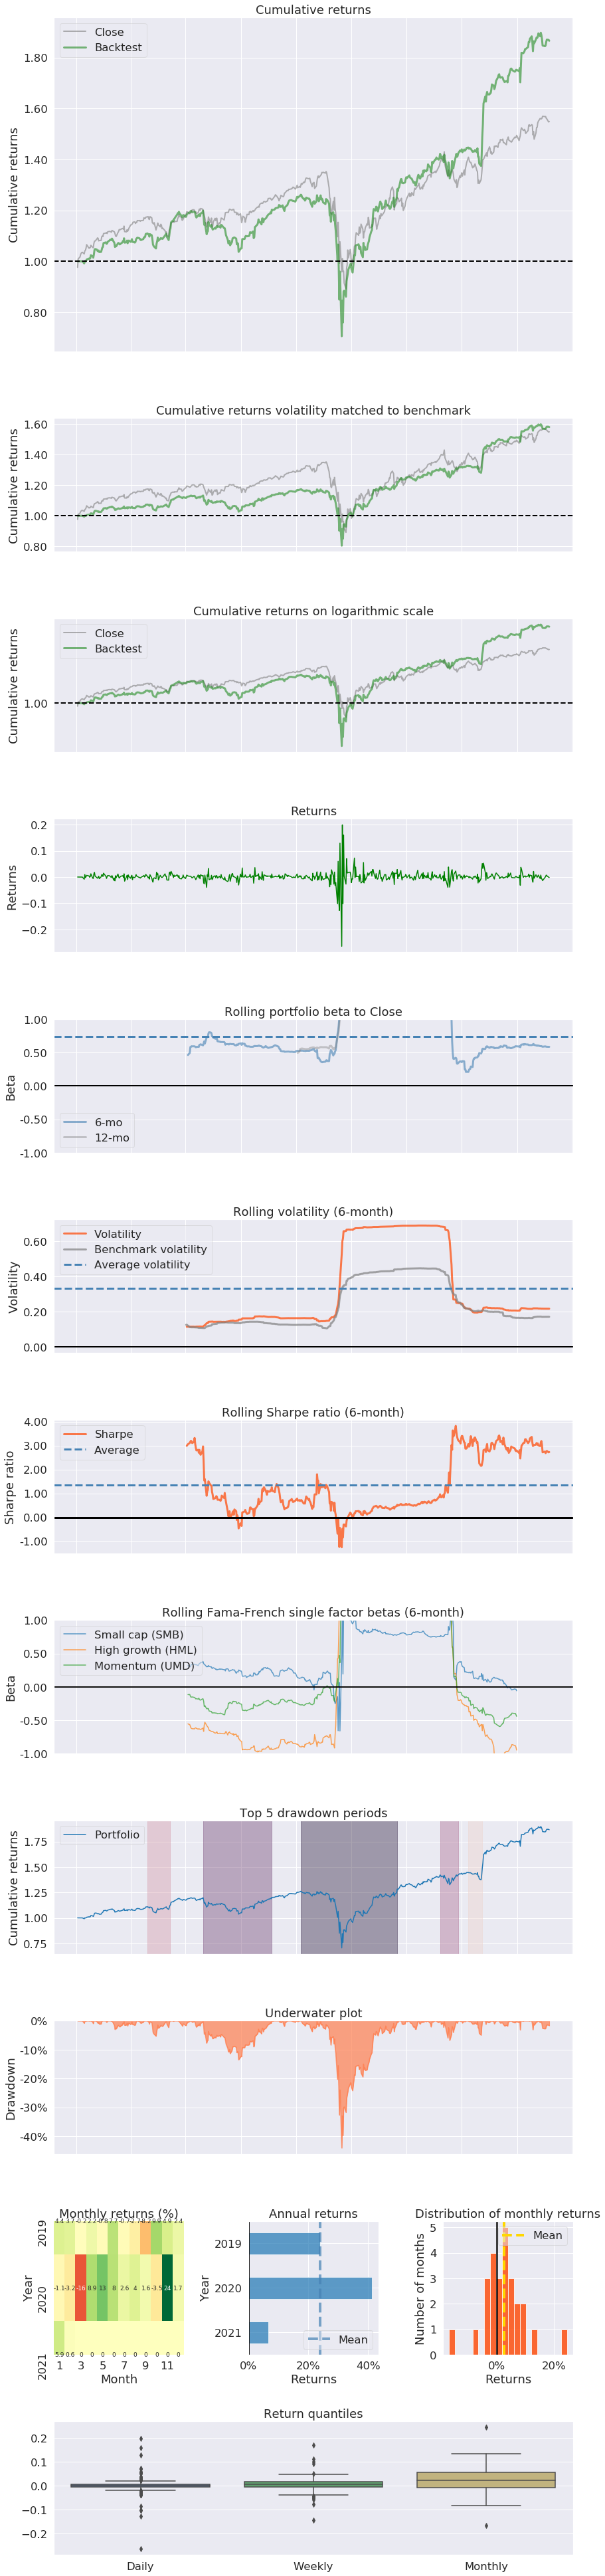

Stress Events,mean,min,max
New Normal,0.14%,-26.44%,19.89%


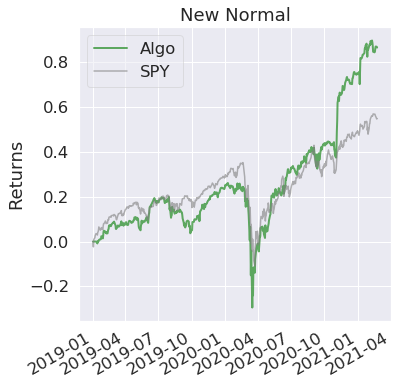

Top 10 long positions of all time,max
PS,53.38%
TLND,21.82%
SMAR,21.69%
QTWO,19.18%
OKTA,18.33%
HUBS,17.73%
WDAY,16.61%
SPLK,15.06%
ADSK,14.67%
AVLR,14.52%


Top 10 short positions of all time,max
PS,-43.50%
PD,-19.39%
TLND,-19.15%
ZM,-15.09%
SMAR,-14.43%
QTWO,-13.33%
TEAM,-12.86%
RP,-12.69%
SHOP,-12.40%
OKTA,-11.35%


Top 10 positions of all time,max
PS,53.38%
TLND,21.82%
SMAR,21.69%
PD,19.39%
QTWO,19.18%
OKTA,18.33%
HUBS,17.73%
WDAY,16.61%
ZM,15.09%
SPLK,15.06%


All positions ever held,max
PS,53.38%
TLND,21.82%
SMAR,21.69%
PD,19.39%
QTWO,19.18%
OKTA,18.33%
HUBS,17.73%
WDAY,16.61%
ZM,15.09%
SPLK,15.06%


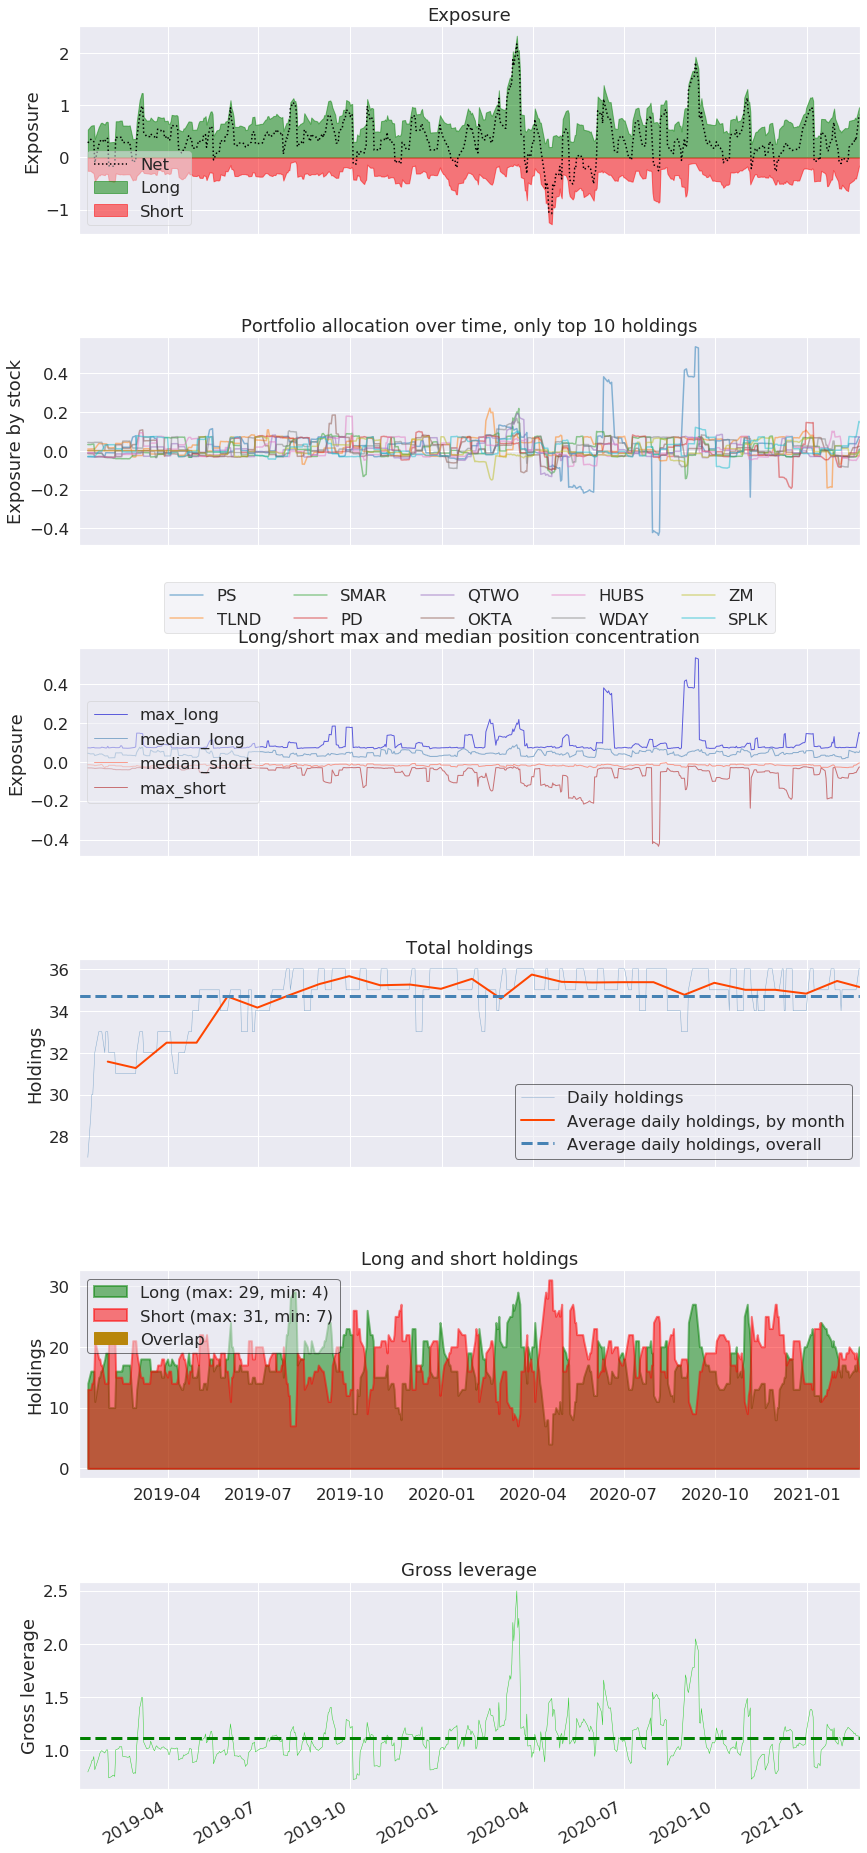

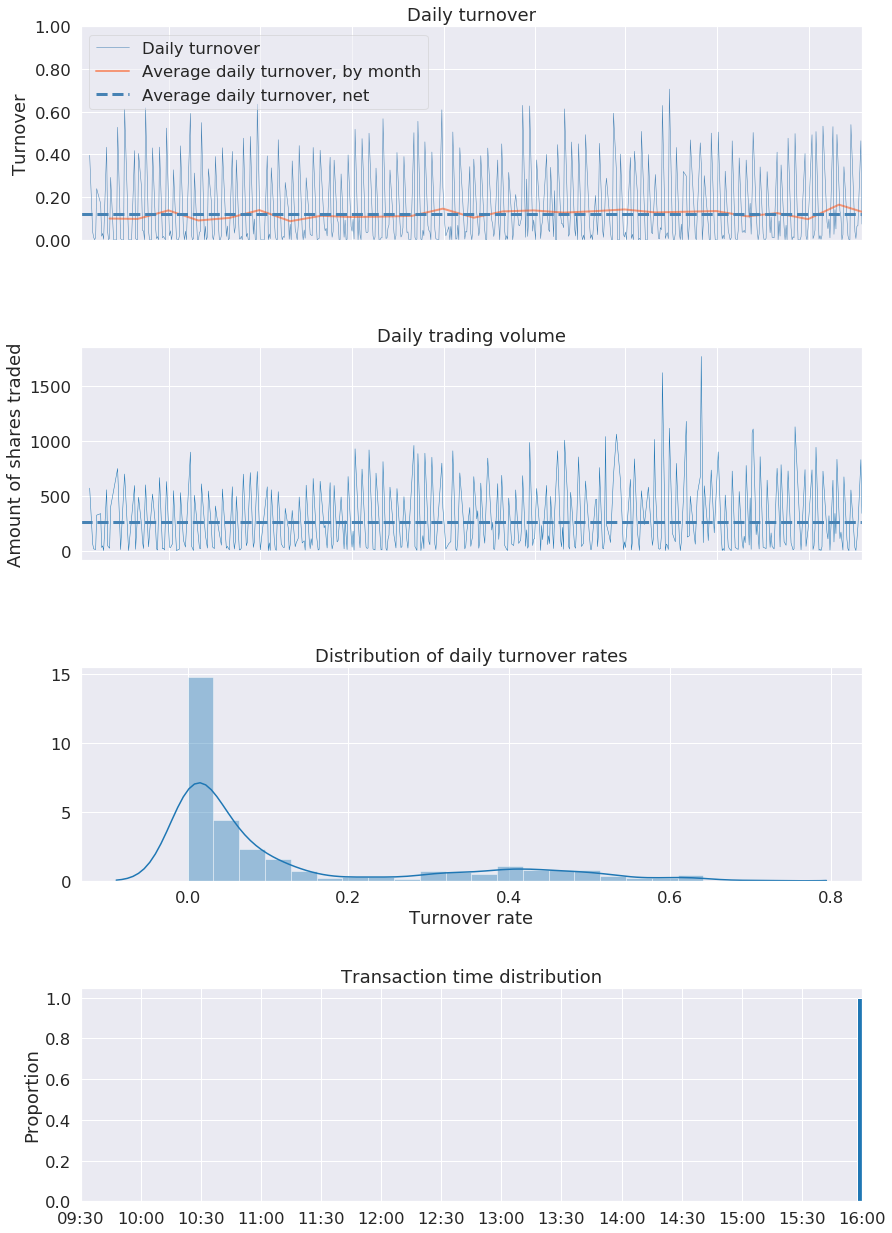

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,2410.00,1216.00,1194.00
Percent profitable,0.58,0.47,0.69
Winning round_trips,1398.00,573.00,825.00
Losing round_trips,1009.00,640.00,369.00
Even round_trips,3.00,3.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$35961.70,$-13225.36,$49187.07
Gross profit,$121066.36,$27569.99,$93496.37
Gross loss,$-85104.66,$-40795.36,$-44309.30
Profit factor,$1.42,$0.68,$2.11
Avg. trade net profit,$14.92,$-10.88,$41.20
Avg. winning trade,$86.60,$48.12,$113.33
Avg. losing trade,$-84.35,$-63.74,$-120.08
Ratio Avg. Win:Avg. Loss,$1.03,$0.75,$0.94
Largest winning trade,$3271.68,$3271.68,$1335.98
Largest losing trade,$-1762.94,$-1323.38,$-1762.94


Duration stats,All trades,Short trades,Long trades
Avg duration,16 days 14:10:30.382987,17 days 12:58:16.386513,15 days 14:57:32.275544
Median duration,14 days 00:00:00,14 days 00:00:00,14 days 00:00:00
Longest duration,77 days 00:00:00,77 days 00:00:00,74 days 01:00:00
Shortest duration,0 days 00:00:00,0 days 03:00:01,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.02%,-0.02%,0.07%
Avg returns winning,0.17%,0.09%,0.22%
Avg returns losing,-0.18%,-0.12%,-0.27%
Median returns all round_trips,0.01%,-0.00%,0.04%
Median returns winning,0.07%,0.05%,0.12%
Median returns losing,-0.06%,-0.06%,-0.09%
Largest winning trade,5.32%,5.32%,2.36%
Largest losing trade,-5.00%,-2.46%,-5.00%


Symbol stats,ADBE,ADSK,APPF,AVLR,BL,BOX,CHGG,CRM,CSOD,DOCU,EVBG,FIVN,HUBS,MIME,NEWR,NOW,OKTA,PD,PLAN,PS,QTWO,RNG,RP,SHOP,SMAR,SPLK,SPSC,TEAM,TLND,TWLO,TWOU,VEEV,WDAY,WORK,ZEN,ZM
Avg returns all round_trips,0.03%,-0.00%,0.05%,0.02%,0.05%,0.02%,0.04%,0.03%,-0.03%,0.04%,0.10%,0.05%,-0.03%,0.02%,0.02%,0.04%,0.00%,-0.02%,0.08%,-0.09%,-0.09%,0.10%,0.04%,0.04%,0.08%,0.00%,0.03%,0.04%,0.08%,0.08%,0.00%,0.01%,-0.02%,0.09%,-0.00%,-0.05%
Avg returns winning,0.12%,0.11%,0.16%,0.13%,0.13%,0.21%,0.18%,0.13%,0.10%,0.14%,0.21%,0.14%,0.17%,0.13%,0.15%,0.15%,0.14%,0.29%,0.18%,0.29%,0.08%,0.24%,0.12%,0.31%,0.30%,0.16%,0.13%,0.13%,0.22%,0.30%,0.20%,0.10%,0.13%,0.22%,0.12%,0.19%
Avg returns losing,-0.08%,-0.14%,-0.12%,-0.08%,-0.06%,-0.22%,-0.16%,-0.12%,-0.22%,-0.11%,-0.07%,-0.12%,-0.23%,-0.18%,-0.17%,-0.12%,-0.18%,-0.32%,-0.15%,-0.69%,-0.22%,-0.12%,-0.09%,-0.22%,-0.17%,-0.23%,-0.10%,-0.11%,-0.16%,-0.17%,-0.23%,-0.10%,-0.32%,-0.18%,-0.15%,-0.39%
Median returns all round_trips,0.01%,0.00%,0.02%,-0.00%,0.01%,0.00%,0.01%,0.01%,0.02%,0.01%,0.02%,0.02%,0.00%,0.01%,0.01%,0.02%,0.00%,-0.00%,0.04%,0.01%,-0.01%,0.02%,0.01%,0.00%,0.00%,0.02%,0.01%,0.03%,0.03%,0.00%,0.00%,0.01%,0.02%,0.02%,0.01%,0.01%
Median returns winning,0.08%,0.04%,0.05%,0.06%,0.06%,0.08%,0.07%,0.06%,0.06%,0.08%,0.08%,0.07%,0.12%,0.04%,0.09%,0.05%,0.06%,0.10%,0.10%,0.06%,0.05%,0.07%,0.04%,0.17%,0.16%,0.09%,0.02%,0.10%,0.08%,0.16%,0.14%,0.05%,0.07%,0.08%,0.07%,0.09%
Median returns losing,-0.05%,-0.07%,-0.04%,-0.06%,-0.03%,-0.10%,-0.05%,-0.04%,-0.05%,-0.04%,-0.04%,-0.06%,-0.09%,-0.08%,-0.06%,-0.07%,-0.10%,-0.10%,-0.08%,-0.16%,-0.05%,-0.07%,-0.03%,-0.09%,-0.12%,-0.06%,-0.05%,-0.08%,-0.07%,-0.07%,-0.11%,-0.06%,-0.04%,-0.13%,-0.05%,-0.37%
Largest winning trade,0.46%,0.88%,1.13%,0.83%,0.50%,1.54%,0.90%,0.83%,0.48%,0.73%,1.90%,0.66%,0.70%,1.15%,1.28%,1.22%,0.71%,1.43%,0.72%,5.32%,0.49%,2.36%,1.91%,1.21%,1.38%,0.56%,1.34%,0.63%,0.94%,2.06%,0.97%,0.44%,0.56%,1.36%,0.61%,1.61%
Largest losing trade,-0.37%,-1.39%,-0.73%,-0.48%,-0.28%,-0.87%,-0.78%,-1.40%,-3.68%,-0.68%,-0.44%,-0.50%,-1.65%,-1.33%,-0.88%,-0.42%,-1.26%,-1.91%,-0.79%,-3.34%,-4.42%,-0.65%,-0.89%,-1.66%,-0.64%,-2.18%,-0.46%,-0.55%,-0.68%,-1.60%,-1.79%,-0.44%,-5.00%,-0.90%,-2.45%,-1.59%


Profitability (PnL / PnL total) per name,
symbol,
EVBG,11.17%
PLAN,8.61%
TLND,8.17%
RNG,7.96%
SMAR,7.89%
TWLO,7.21%
WORK,6.01%
APPF,5.97%
FIVN,5.16%


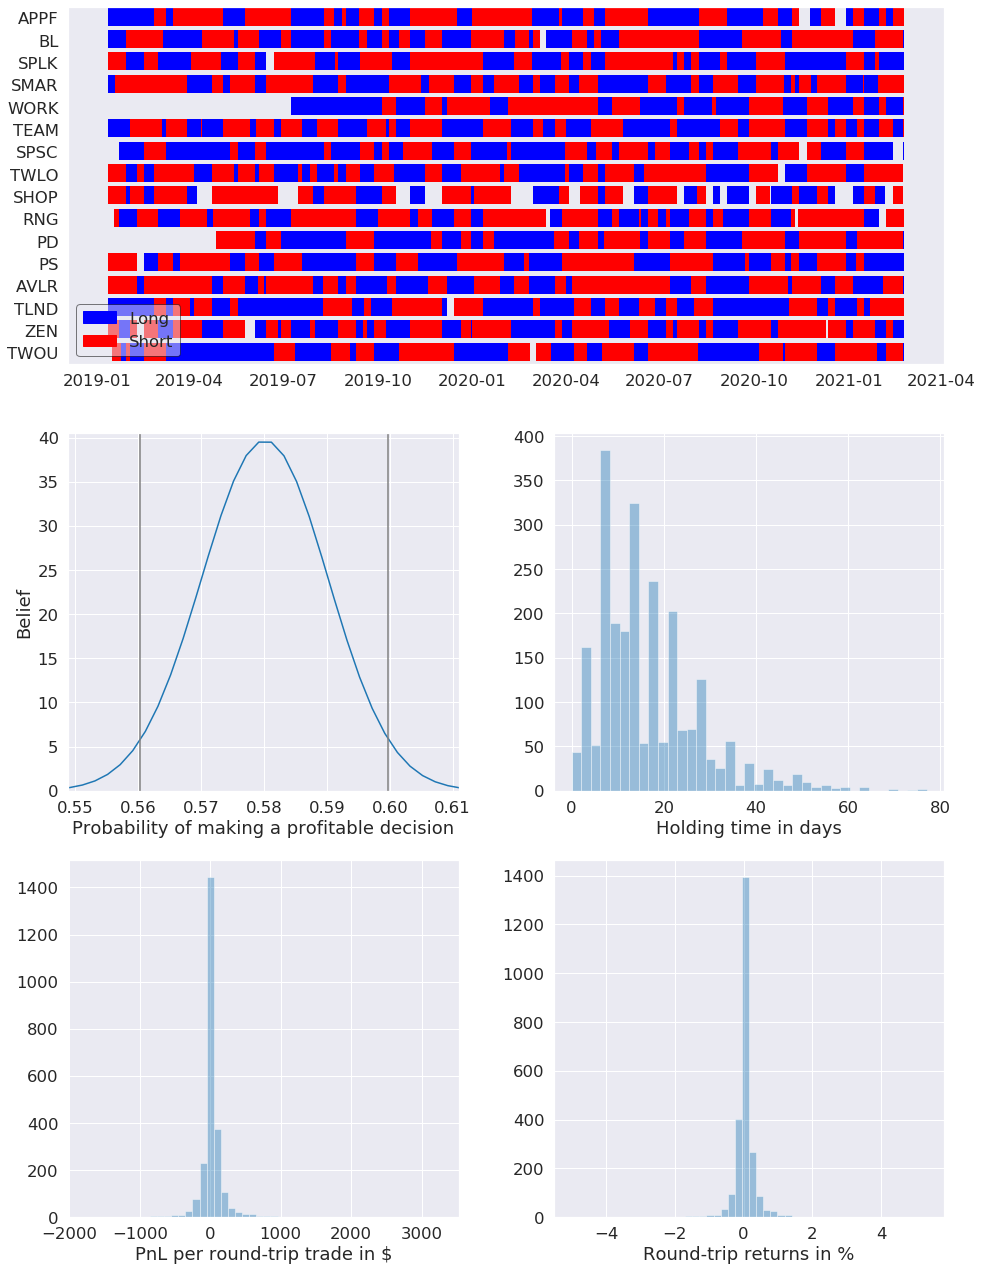

In [19]:
#%%pixie_debugger

from zipline.data import benchmarks
# Set up benchmark Asset 
spy_bm_ret    = benchmarks.get_benchmark_returns(symbol='SPY', first_date=sim_start, last_date=sim_end)
spy_bm_ret    = spy_bm_ret[sim_start:sim_end]
spy_bm_ret[0] = 0.0 # Normalize benchmark returns to start at 0.0.
perf          = perf[sim_start:sim_end]

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, bootstrap=None,benchmark_rets=spy_bm_ret, round_trips=True)
#pf.create_simple_tear_sheet(returns=returns,positions=positions,transactions=transactions)